<a href="https://colab.research.google.com/github/shredinc/dotfiles/blob/master/Matthias_attribute_cleaning_New.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import requests
from bs4 import BeautifulSoup
from PIL import Image
from PIL import ImageOps
import cv2
from scipy import cluster
from sklearn.preprocessing import MinMaxScaler
import imagesize
import random
from sklearn.preprocessing import LabelEncoder
from ipywidgets import interact
import time
from io import BytesIO
from keras.layers import Input
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import FunctionTransformer
from keras.utils import load_img, img_to_array
from tqdm.notebook import tqdm

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')
  

Mounted at /content/drive


In [ ]:
! unzip '/content/drive/MyDrive/Colab Notebooks/Data Moda/img.zip' -d '/content/drive/MyDrive/Colab Notebooks/Data Moda'

Streaming output truncated to the last 5000 lines.
  inflating: /content/drive/MyDrive/Colab Notebooks/Data Moda/img/Woven_Dolphin_Shorts/img_00000027.jpg  
  inflating: /content/drive/MyDrive/Colab Notebooks/Data Moda/img/Woven_Dolphin_Shorts/img_00000028.jpg  
  inflating: /content/drive/MyDrive/Colab Notebooks/Data Moda/img/Woven_Dolphin_Shorts/img_00000029.jpg  
  inflating: /content/drive/MyDrive/Colab Notebooks/Data Moda/img/Woven_Dolphin_Shorts/img_00000030.jpg  
  inflating: /content/drive/MyDrive/Colab Notebooks/Data Moda/img/Woven_Dolphin_Shorts/img_00000031.jpg  
  inflating: /content/drive/MyDrive/Colab Notebooks/Data Moda/img/Woven_Dolphin_Shorts/img_00000032.jpg  
  inflating: /content/drive/MyDrive/Colab Notebooks/Data Moda/img/Woven_Dolphin_Shorts/img_00000033.jpg  
  inflating: /content/drive/MyDrive/Colab Notebooks/Data Moda/img/Woven_Dolphin_Shorts/img_00000034.jpg  
  inflating: /content/drive/MyDrive/Colab Notebooks/Data Moda/img/Woven_Dolphin_Shorts/img_00000035.j

# Load raw data

In [ ]:
PATH_IMG = '/content/drive/MyDrive/Colab Notebooks/Data Moda/img/'
PATH_DATA = '/content/drive/MyDrive/Colab Notebooks/Data Moda'

In [ ]:
cat_names = pd.read_csv(PATH_DATA+'/list_category.txt',sep ='\s+',header=None).reset_index().rename(columns={0:'category',1:'section','index':'cat_num'})



In [ ]:
cat_names['cat_num'] = cat_names['cat_num'].apply(lambda x : x+1)

In [ ]:
cat_names.head()

cat_num     category  section
0        1       Anorak        1
1        2       Blazer        1
2        3       Blouse        1
3        4       Bomber        1
4        5  Button-Down        1

In [ ]:
cat_tag = pd.read_csv(PATH_DATA+'/tag_cat_simple.txt',sep='\s+',header=None,names=['category']).rename(columns={'category':'cat_num'})



In [ ]:
cat_img = pd.read_csv(PATH_DATA+'/img_simple.txt',sep='\s+',header=None,names=['category']).rename(columns={'category':'img'})

In [ ]:
cat_num = cat_img.join(cat_tag).drop(columns='img')


In [ ]:
cat_num.head()

cat_num
0        3
1       33
2       41
3       26
4        2

In [ ]:
cat = cat_num.merge(cat_names, on='cat_num', how='left').drop(columns='cat_num')



In [ ]:
cat

category  section
0        Blouse        1
1         Skirt        2
2         Dress        3
3         Jeans        2
4        Blazer        1
...         ...      ...
19995      Tank        1
19996   Sweater        1
19997    Henley        1
19998  Jumpsuit        3
19999     Dress        3

[20000 rows x 2 columns]

In [ ]:
cat['section'] = cat['section'].map({1:'upper',2:'lower',3:'full body'})

In [ ]:
cat_names = pd.read_csv(PATH_DATA+'/list_category.txt',sep ='\s+',header=None).reset_index().rename(columns={0:'category',1:'section','index':'cat_num'})



In [ ]:
cat_names['cat_num'] = cat_names['cat_num'].apply(lambda x : x+1)

In [ ]:
cat_names.head()

cat_num     category  section
0        1       Anorak        1
1        2       Blazer        1
2        3       Blouse        1
3        4       Bomber        1
4        5  Button-Down        1

In [ ]:
cat_tag = pd.read_csv(PATH_DATA+'/tag_cat_simple.txt',sep='\s+',header=None,names=['category']).rename(columns={'category':'cat_num'})



In [ ]:
cat_img = pd.read_csv(PATH_DATA+'/img_simple.txt',sep='\s+',header=None,names=['category']).rename(columns={'category':'img'})

In [ ]:
cat_num = cat_img.join(cat_tag)


In [ ]:
cat_num.head()

img  cat_num
0          img/Sweet_Crochet_Blouse/img_00000070.jpg        3
1          img/Classic_Pencil_Skirt/img_00000010.jpg       33
2  img/Strapless_Diamond_Print_Dress/img_00000038...       41
3  img/Mid-Rise_-_Acid_Wash_Skinny_Jeans/img_0000...       26
4  img/Zippered_Single-Button_Blazer/img_00000078...        2

In [ ]:
cat = cat_num.merge(cat_names, on='cat_num', how='left').drop(columns='cat_num')


In [ ]:
cat['img'] = cat['img'].apply(lambda x: x[4:])

In [ ]:
cat

img  category  section
0                  Sweet_Crochet_Blouse/img_00000070.jpg    Blouse        1
1                  Classic_Pencil_Skirt/img_00000010.jpg     Skirt        2
2         Strapless_Diamond_Print_Dress/img_00000038.jpg     Dress        3
3      Mid-Rise_-_Acid_Wash_Skinny_Jeans/img_00000010...     Jeans        2
4         Zippered_Single-Button_Blazer/img_00000078.jpg    Blazer        1
...                                                  ...       ...      ...
19995          Embroidered_Peasant_Tank/img_00000044.jpg      Tank        1
19996           Tasmanian_Devil_Sweater/img_00000048.jpg   Sweater        1
19997        Lace-Sleeved_Raglan_Henley/img_00000022.jpg    Henley        1
19998      Floral_Mosaic_Print_Jumpsuit/img_00000017.jpg  Jumpsuit        3
19999            Sparkling_Ruched_Dress/img_00000047.jpg     Dress        3

[20000 rows x 3 columns]

In [ ]:
cat['section'] = cat['section'].map({1:'upper',2:'lower',3:'full body'})

In [ ]:
attr_names = pd.read_csv(PATH_DATA+'/list_attr_simple.txt',sep='\s+', header=None).rename(columns={0:'attribute',1:'attribute type'})


In [ ]:
attr_names

attribute  attribute type
0            floral               1
1           graphic               1
2           striped               1
3       embroidered               1
4           pleated               1
5             solid               1
6           lattice               1
7       long_sleeve               2
8      short_sleeve               2
9        sleeveless               2
10      maxi_length               3
11      mini_length               3
12         no_dress               3
13    crew_neckline               4
14       v_neckline               4
15  square_neckline               4
16      no_neckline               4
17            denim               5
18          chiffon               5
19           cotton               5
20          leather               5
21             faux               5
22             knit               5
23            tight               6
24            loose               6
25     conventional               6

In [ ]:
attr_names['attribute type'] = attr_names['attribute type'].map({1:'design',2:'sleeves',3:'length',4:'part',5:'fabric',6:'fit'})


In [ ]:
attr_names_headers = attr_names.iloc[:,0]
attr_names_headers

0              floral
1             graphic
2             striped
3         embroidered
4             pleated
5               solid
6             lattice
7         long_sleeve
8        short_sleeve
9          sleeveless
10        maxi_length
11        mini_length
12           no_dress
13      crew_neckline
14         v_neckline
15    square_neckline
16        no_neckline
17              denim
18            chiffon
19             cotton
20            leather
21               faux
22               knit
23              tight
24              loose
25       conventional
Name: attribute, dtype: object

In [ ]:
attr_tags = pd.read_csv(PATH_DATA+'/tags_attr_simple.txt',sep='\s+',header=None,names=attr_names_headers)


In [ ]:
attr_tags

floral  graphic  striped  embroidered  pleated  solid  lattice  \
0           0        0        0            1        0      0        0   
1           0        0        0            0        0      1        0   
2           0        1        0            0        0      0        0   
3           0        0        0            0        0      1        0   
4           0        0        0            0        0      1        0   
...       ...      ...      ...          ...      ...    ...      ...   
19995       0        0        0            1        0      0        0   
19996       0        0        0            0        0      1        0   
19997       0        0        1            0        0      0        0   
19998       1        0        0            0        0      0        0   
19999       0        0        0            1        0      0        0   

       long_sleeve  short_sleeve  sleeveless  maxi_length  mini_length  \
0                0             0           1            0            0   
1                0             0           1            0            0   
2                0             0           1            1            0   
3                0             0           1            0            0   
4                1             0           0            0            0   
...            ...           ...         ...          ...          ...   
19995            0             0           1            0            0   
19996            1             0           0            0            0   
19997            1             0           0            0            0   
19998            0             1           0            0            0   
19999            0             0           1            0            1   

       no_dress  crew_neckline  v_neckline  square_neckline  no_neckline  \
0             1              0           0                0            1   
1             1              0           0                0            1   
2             0              0           0                0            1   
3             1              0           0                0            1   
4             1              0           1                0            0   
...         ...            ...         ...              ...          ...   
19995         1              0           1                0            0   
19996         1              0           1                0            0   
19997         1              1           0                0            0   
19998         1              0           1                0            0   
19999         0              0           0                0            1   

       denim  chiffon  cotton  leather  faux  knit  tight  loose  conventional  
0          0        1       0        0     0     0      0      0             1  
1          0        0       1        0     0     0      1      0             0  
2          0        0       1        0     0     0      0      0             1  
3          1        0       0        0     0     0      1      0             0  
4          0        0       1        0     0     0      0      0             1  
...      ...      ...     ...      ...   ...   ...    ...    ...           ...  
19995      0        0       1        0     0     0      0      0             1  
19996      0        0       0        0     0     1      0      0             1  
19997      0        0       1        0     0     0      0      0             1  
19998      0        0       1        0     0     0      0      0             1  
19999      0        1       0        0     0     0      0      0             1  

[20000 rows x 26 columns]

In [ ]:
attr_img = pd.read_csv(PATH_DATA+'/img_simple.txt',sep='\s+',header=None).rename(columns={0:'img'})



In [ ]:
attr_img

img
0              img/Sweet_Crochet_Blouse/img_00000070.jpg
1              img/Classic_Pencil_Skirt/img_00000010.jpg
2      img/Strapless_Diamond_Print_Dress/img_00000038...
3      img/Mid-Rise_-_Acid_Wash_Skinny_Jeans/img_0000...
4      img/Zippered_Single-Button_Blazer/img_00000078...
...                                                  ...
19995      img/Embroidered_Peasant_Tank/img_00000044.jpg
19996       img/Tasmanian_Devil_Sweater/img_00000048.jpg
19997    img/Lace-Sleeved_Raglan_Henley/img_00000022.jpg
19998  img/Floral_Mosaic_Print_Jumpsuit/img_00000017.jpg
19999        img/Sparkling_Ruched_Dress/img_00000047.jpg

[20000 rows x 1 columns]

In [ ]:
attr = attr_img.join(attr_tags,how='inner').drop(columns='img')

In [ ]:
attr

floral  graphic  striped  embroidered  pleated  solid  lattice  \
0           0        0        0            1        0      0        0   
1           0        0        0            0        0      1        0   
2           0        1        0            0        0      0        0   
3           0        0        0            0        0      1        0   
4           0        0        0            0        0      1        0   
...       ...      ...      ...          ...      ...    ...      ...   
19995       0        0        0            1        0      0        0   
19996       0        0        0            0        0      1        0   
19997       0        0        1            0        0      0        0   
19998       1        0        0            0        0      0        0   
19999       0        0        0            1        0      0        0   

       long_sleeve  short_sleeve  sleeveless  maxi_length  mini_length  \
0                0             0           1            0            0   
1                0             0           1            0            0   
2                0             0           1            1            0   
3                0             0           1            0            0   
4                1             0           0            0            0   
...            ...           ...         ...          ...          ...   
19995            0             0           1            0            0   
19996            1             0           0            0            0   
19997            1             0           0            0            0   
19998            0             1           0            0            0   
19999            0             0           1            0            1   

       no_dress  crew_neckline  v_neckline  square_neckline  no_neckline  \
0             1              0           0                0            1   
1             1              0           0                0            1   
2             0              0           0                0            1   
3             1              0           0                0            1   
4             1              0           1                0            0   
...         ...            ...         ...              ...          ...   
19995         1              0           1                0            0   
19996         1              0           1                0            0   
19997         1              1           0                0            0   
19998         1              0           1                0            0   
19999         0              0           0                0            1   

       denim  chiffon  cotton  leather  faux  knit  tight  loose  conventional  
0          0        1       0        0     0     0      0      0             1  
1          0        0       1        0     0     0      1      0             0  
2          0        0       1        0     0     0      0      0             1  
3          1        0       0        0     0     0      1      0             0  
4          0        0       1        0     0     0      0      0             1  
...      ...      ...     ...      ...   ...   ...    ...    ...           ...  
19995      0        0       1        0     0     0      0      0             1  
19996      0        0       0        0     0     1      0      0             1  
19997      0        0       1        0     0     0      0      0             1  
19998      0        0       1        0     0     0      0      0             1  
19999      0        1       0        0     0     0      0      0             1  

[20000 rows x 26 columns]

In [ ]:
bb = pd.read_csv(PATH_DATA+'/bbox.txt',sep='\s+',header=None,index_col=False, names=['img','x_1', 'y_1', 'x_2', 'y_2'])


In [ ]:
bb['img'] = bb['img'].apply(lambda x: x[4:])

In [ ]:
landmarks = pd.read_csv(PATH_DATA+'/landmarks.txt',sep='\s+',names=['img','clothes_type','v1','x1','y1','v2','x2','y2','v3','x3','y3','v4','x4','y4','v5','x5','y5','v6','x6','y6','v7','x7','y7','v8','x8','y8']).fillna(0).drop(columns=['clothes_type'])



In [ ]:
landmarks['img'] = landmarks['img'].apply(lambda x: x[4:])

In [ ]:
data_full = cat.join(attr,how='left').merge(bb,how='left',on='img').merge(landmarks, how='left',on='img')



# Encode Category

In [ ]:
y_values = data_full.category.values


In [ ]:
y_values

array(['Blouse', 'Skirt', 'Dress', ..., 'Henley', 'Jumpsuit', 'Dress'],
      dtype=object)

In [ ]:
y=np.expand_dims(data_full.category, axis=1)

In [ ]:
y.shape

(20000, 1)

In [ ]:
y[0:10]

array([['Blouse'],
       ['Skirt'],
       ['Dress'],
       ['Jeans'],
       ['Blazer'],
       ['Dress'],
       ['Top'],
       ['Tee'],
       ['Kimono'],
       ['Dress']], dtype=object)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(sparse=False)

y_enc = enc.fit_transform(y)

In [ ]:
enc.get_feature_names_out()

array(['x0_Anorak', 'x0_Blazer', 'x0_Blouse', 'x0_Bomber',
       'x0_Button-Down', 'x0_Caftan', 'x0_Capris', 'x0_Cardigan',
       'x0_Chinos', 'x0_Coat', 'x0_Coverup', 'x0_Culottes', 'x0_Cutoffs',
       'x0_Dress', 'x0_Flannel', 'x0_Halter', 'x0_Henley', 'x0_Hoodie',
       'x0_Jacket', 'x0_Jeans', 'x0_Jeggings', 'x0_Jersey', 'x0_Jodhpurs',
       'x0_Joggers', 'x0_Jumpsuit', 'x0_Kaftan', 'x0_Kimono',
       'x0_Leggings', 'x0_Onesie', 'x0_Parka', 'x0_Peacoat', 'x0_Poncho',
       'x0_Robe', 'x0_Romper', 'x0_Sarong', 'x0_Shorts', 'x0_Skirt',
       'x0_Sweater', 'x0_Sweatpants', 'x0_Sweatshorts', 'x0_Tank',
       'x0_Tee', 'x0_Top', 'x0_Trunks', 'x0_Turtleneck'], dtype=object)

In [ ]:
y_enc

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

# Crop and augment images

In [ ]:
data_full

img  category    section  \
0                  Sweet_Crochet_Blouse/img_00000070.jpg    Blouse      upper   
1                  Classic_Pencil_Skirt/img_00000010.jpg     Skirt      lower   
2         Strapless_Diamond_Print_Dress/img_00000038.jpg     Dress  full body   
3      Mid-Rise_-_Acid_Wash_Skinny_Jeans/img_00000010...     Jeans      lower   
4         Zippered_Single-Button_Blazer/img_00000078.jpg    Blazer      upper   
...                                                  ...       ...        ...   
19995          Embroidered_Peasant_Tank/img_00000044.jpg      Tank      upper   
19996           Tasmanian_Devil_Sweater/img_00000048.jpg   Sweater      upper   
19997        Lace-Sleeved_Raglan_Henley/img_00000022.jpg    Henley      upper   
19998      Floral_Mosaic_Print_Jumpsuit/img_00000017.jpg  Jumpsuit  full body   
19999            Sparkling_Ruched_Dress/img_00000047.jpg     Dress  full body   

       floral  graphic  striped  embroidered  pleated  solid  lattice  \
0           0        0        0            1        0      0        0   
1           0        0        0            0        0      1        0   
2           0        1        0            0        0      0        0   
3           0        0        0            0        0      1        0   
4           0        0        0            0        0      1        0   
...       ...      ...      ...          ...      ...    ...      ...   
19995       0        0        0            1        0      0        0   
19996       0        0        0            0        0      1        0   
19997       0        0        1            0        0      0        0   
19998       1        0        0            0        0      0        0   
19999       0        0        0            1        0      0        0   

       long_sleeve  short_sleeve  sleeveless  maxi_length  mini_length  \
0                0             0           1            0            0   
1                0             0           1            0            0   
2                0             0           1            1            0   
3                0             0           1            0            0   
4                1             0           0            0            0   
...            ...           ...         ...          ...          ...   
19995            0             0           1            0            0   
19996            1             0           0            0            0   
19997            1             0           0            0            0   
19998            0             1           0            0            0   
19999            0             0           1            0            1   

       no_dress  crew_neckline  v_neckline  square_neckline  no_neckline  \
0             1              0           0                0            1   
1             1              0           0                0            1   
2             0              0           0                0            1   
3             1              0           0                0            1   
4             1              0           1                0            0   
...         ...            ...         ...              ...          ...   
19995         1              0           1                0            0   
19996         1              0           1                0            0   
19997         1              1           0                0            0   
19998         1              0           1                0            0   
19999         0              0           0                0            1   

       denim  chiffon  cotton  leather  faux  knit  tight  loose  \
0          0        1       0        0     0     0      0      0   
1          0        0       1        0     0     0      1      0   
2          0        0       1        0     0     0      0      0   
3          1        0       0        0     0     0      1      0   
4          0        0       1        0     0     0      0    

In [ ]:
data_full_attr = data_full.iloc[:,3:-28]

In [ ]:
data_full_attr

floral  graphic  striped  embroidered  pleated  solid  lattice  \
0           0        0        0            1        0      0        0   
1           0        0        0            0        0      1        0   
2           0        1        0            0        0      0        0   
3           0        0        0            0        0      1        0   
4           0        0        0            0        0      1        0   
...       ...      ...      ...          ...      ...    ...      ...   
19995       0        0        0            1        0      0        0   
19996       0        0        0            0        0      1        0   
19997       0        0        1            0        0      0        0   
19998       1        0        0            0        0      0        0   
19999       0        0        0            1        0      0        0   

       long_sleeve  short_sleeve  sleeveless  maxi_length  mini_length  \
0                0             0           1            0            0   
1                0             0           1            0            0   
2                0             0           1            1            0   
3                0             0           1            0            0   
4                1             0           0            0            0   
...            ...           ...         ...          ...          ...   
19995            0             0           1            0            0   
19996            1             0           0            0            0   
19997            1             0           0            0            0   
19998            0             1           0            0            0   
19999            0             0           1            0            1   

       no_dress  crew_neckline  v_neckline  square_neckline  no_neckline  \
0             1              0           0                0            1   
1             1              0           0                0            1   
2             0              0           0                0            1   
3             1              0           0                0            1   
4             1              0           1                0            0   
...         ...            ...         ...              ...          ...   
19995         1              0           1                0            0   
19996         1              0           1                0            0   
19997         1              1           0                0            0   
19998         1              0           1                0            0   
19999         0              0           0                0            1   

       denim  chiffon  cotton  leather  faux  knit  tight  loose  conventional  
0          0        1       0        0     0     0      0      0             1  
1          0        0       1        0     0     0      1      0             0  
2          0        0       1        0     0     0      0      0             1  
3          1        0       0        0     0     0      1      0             0  
4          0        0       1        0     0     0      0      0             1  
...      ...      ...     ...      ...   ...   ...    ...    ...           ...  
19995      0        0       1        0     0     0      0      0             1  
19996      0        0       0        0     0     1      0      0             1  
19997      0        0       1        0     0     0      0      0             1  
19998      0        0       1        0     0     0      0      0             1  
19999      0        1       0        0     0     0      0      0             1  

[20000 rows x 26 columns]

In [ ]:
attribute_count = data_full_attr.apply(pd.value_counts)

In [ ]:
attribute_count_T = attribute_count.T.reset_index().rename(columns={'index':'attribute'})

In [ ]:
attribute_count_T

attribute      0      1
0            floral  16598   3402
1           graphic  16654   3346
2           striped  18653   1347
3       embroidered  18333   1667
4           pleated  19586    414
5             solid  10518   9482
6           lattice  19658    342
7       long_sleeve  13883   6117
8      short_sleeve  16526   3474
9        sleeveless   9591  10409
10      maxi_length  17971   2029
11      mini_length  16166   3834
12         no_dress   5863  14137
13    crew_neckline  11914   8086
14       v_neckline  16542   3458
15  square_neckline  19939     61
16      no_neckline  11605   8395
17            denim  18806   1194
18          chiffon  17115   2885
19           cotton   6396  13604
20          leather  19594    406
21             faux  19811    189
22             knit  18278   1722
23            tight  17109   2891
24            loose  18931   1069
25     conventional   3960  16040

In [ ]:
attribute_count_type = attribute_count_T.merge(attr_names, on='attribute')

In [ ]:
attribute_count_type

attribute      0      1 attribute type
0            floral  16598   3402         design
1           graphic  16654   3346         design
2           striped  18653   1347         design
3       embroidered  18333   1667         design
4           pleated  19586    414         design
5             solid  10518   9482         design
6           lattice  19658    342         design
7       long_sleeve  13883   6117        sleeves
8      short_sleeve  16526   3474        sleeves
9        sleeveless   9591  10409        sleeves
10      maxi_length  17971   2029         length
11      mini_length  16166   3834         length
12         no_dress   5863  14137         length
13    crew_neckline  11914   8086           part
14       v_neckline  16542   3458           part
15  square_neckline  19939     61           part
16      no_neckline  11605   8395           part
17            denim  18806   1194         fabric
18          chiffon  17115   2885         fabric
19           cotton   6396  13604         fabric
20          leather  19594    406         fabric
21             faux  19811    189         fabric
22             knit  18278   1722         fabric
23            tight  17109   2891            fit
24            loose  18931   1069            fit
25     conventional   3960  16040            fit

In [ ]:
attribute_count_type_mean = attribute_count_type.groupby('attribute type').median().drop(columns=0)

In [ ]:
attribute_count_type_mean

1
attribute type        
design          1667.0
fabric          1458.0
fit             2891.0
length          3834.0
part            5772.0
sleeves         6117.0

In [ ]:
attribute_count_mean = attribute_count_type[1].median()
attribute_count_mean

3118.5

In [ ]:
attr_names_list = attribute_count_type['attribute'].values
attr_names_list

array(['floral', 'graphic', 'striped', 'embroidered', 'pleated', 'solid',
       'lattice', 'long_sleeve', 'short_sleeve', 'sleeveless',
       'maxi_length', 'mini_length', 'no_dress', 'crew_neckline',
       'v_neckline', 'square_neckline', 'no_neckline', 'denim', 'chiffon',
       'cotton', 'leather', 'faux', 'knit', 'tight', 'loose',
       'conventional'], dtype=object)

In [ ]:
def landmark_crop(index): # NOT USED AT THE MOMENT !
    observation = data_full.iloc[index,:] # get observation from database according to index
    v1,x1,y1,v2,x2,y2,v3,x3,y3,v4,x4,y4=observation[-24:-12] # landmarks belonging to ALL images
    lm_x = [x1,x2,x3,x4]
    lm_y = [y1,y2,y3,y4]
    lm_v = [v1,v2,v3,v4]
    
    section = data_full.iloc[index,2] # get section type for image
    if section == 'upper' or section == 'full body': # if image is an upper or full body, has 6 landmarks
        v5,x5,y5,v6,x6,y6=observation[-12:-6]
        lm_x.extend([x5,x6])
        lm_y.extend([y5,y6])
        lm_v.extend([v5,v6])
    if section == 'full body': # if image is full body has 8 landmarks
        v7,x7,y7,v8,x8,y8=observation[-6:]
        lm_x.extend([x7,x8])
        lm_y.extend([y7,y8])
        lm_v.extend([v7,v8])
    
    lm_x = np.array(lm_x)
    lm_y = np.array(lm_y)
    lm_x = lm_x[lm_x !=0] # keep only non-zero landmarks 
    lm_y = lm_y[lm_y !=0]
    
    pts = (np.array(list(zip(lm_x,lm_y)))).astype('int') # store coordinates defined by landmarks
    
    img_name = observation[0]
    full_path = PATH+img_name
    
    img = cv2.imread(full_path) # open image using OpenCV
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # convert image to correct format
    
    x,y,w,h = cv2.boundingRect(pts) # create approximate rectangle using landmark points
    cropped = Image.fromarray(img[y:y+h, x:x+w].copy()) # crop image by bounding rectangle

    return cropped
    

In [ ]:
def format_image(index): # format image
    observation = data_full.iloc[index,:] # get observation from database according to index    
    img_name = observation[0]
    full_path = PATH_IMG+img_name
    
    img = cv2.imread(full_path) # open image using OpenCV
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    # CROP IMAGES:
    plt.imshow(img)
    box_x1,box_y1,box_x2,box_y2 = (np.array(observation[-28:-24].values)) # box coords
    cropped = Image.fromarray(img[box_y1:box_y2, box_x1:box_x2].copy()) # crop image using box

    # PAD IMAGES:
    cropped_pad = ImageOps.pad(cropped,(256,256),color=(255, 255, 255)) # pad image to (256,256) with white background

    
    # AUGMENT IMAGES:
#     # Create an ImageDataGenerator object with the desired transformations
#     datagen = ImageDataGenerator(
#         rotation_range=40,
#         zoom_range=0.2,
#         horizontal_flip=True
#     )
#     # Load the original image
#     image = im_pad
#     # Convert the image to a Numpy array
#     x = img_to_array(image)
#     # Reshape the array to include an extra dimension for the number of images
#     x = x.reshape((1,) + x.shape)
#     # Generate the augmented images and save them
#     i = 0
#     for batch in datagen.flow(x, batch_size=1, save_to_dir=PATH, save_format='jpg'):
#         i += 1
#         if i >= 10:
#             break
    return cropped_pad


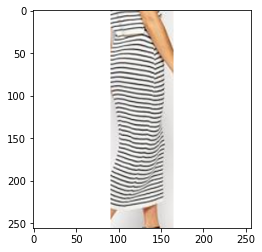

In [ ]:
sample_index = np.random.randint(20000)
image = format_image(sample_index)

plt.imshow(image)

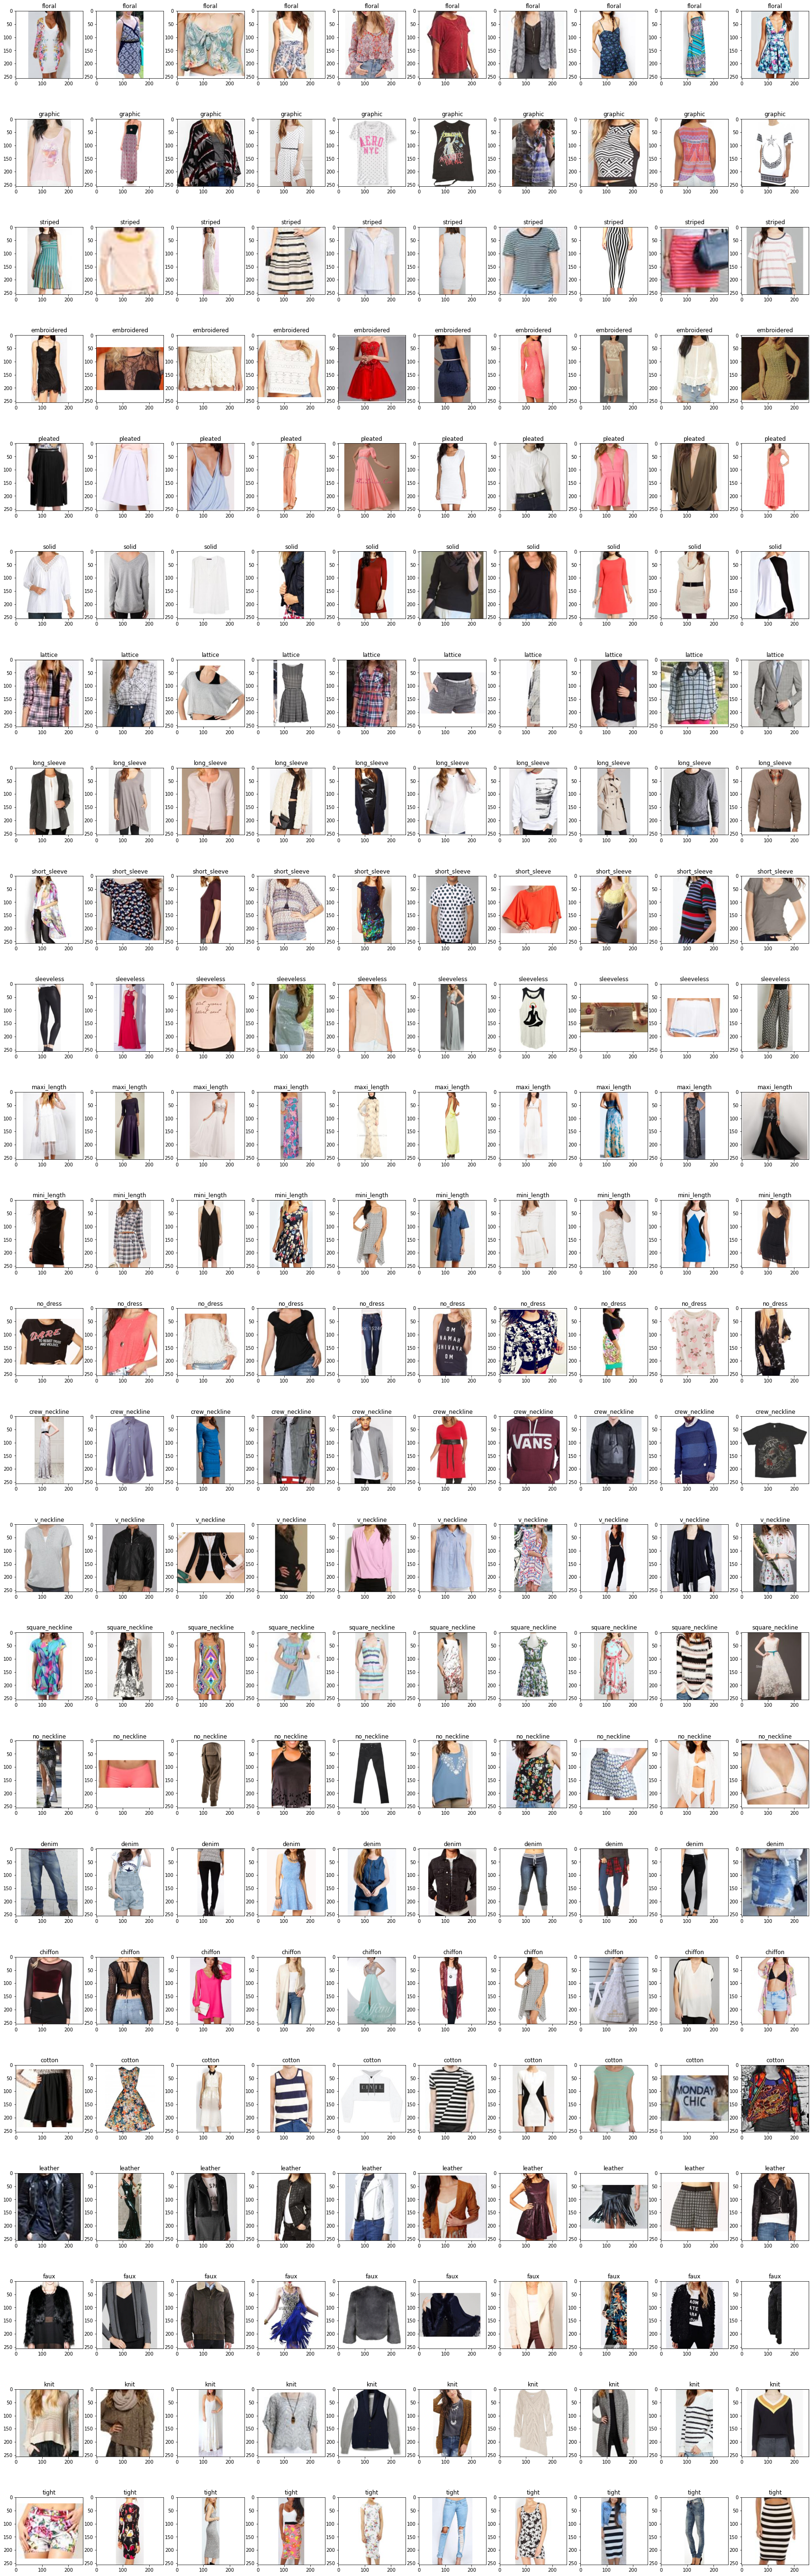

In [ ]:
fig, axs = plt.subplots(24,10,figsize=(30,100))
for i in range(24):
    for j in range(10):
        index = data_full[data_full[attr_names_list[i]]==1].sample(1).index._data[0]
        img = format_image(index)
        img = axs[i][j].imshow(img)
        axs[i][j].title.set_text(attr_names_list[i])

In [ ]:
def landmark_crop(index): # NOT USED AT THE MOMENT !
    observation = data_full.iloc[index,:] # get observation from database according to index
    v1,x1,y1,v2,x2,y2,v3,x3,y3,v4,x4,y4=observation[-24:-12] # landmarks belonging to ALL images
    lm_x = [x1,x2,x3,x4]
    lm_y = [y1,y2,y3,y4]
    lm_v = [v1,v2,v3,v4]
    
    section = data_full.iloc[index,2] # get section type for image
    if section == 'upper' or section == 'full body': # if image is an upper or full body, has 6 landmarks
        v5,x5,y5,v6,x6,y6=observation[-12:-6]
        lm_x.extend([x5,x6])
        lm_y.extend([y5,y6])
        lm_v.extend([v5,v6])
    if section == 'full body': # if image is full body has 8 landmarks
        v7,x7,y7,v8,x8,y8=observation[-6:]
        lm_x.extend([x7,x8])
        lm_y.extend([y7,y8])
        lm_v.extend([v7,v8])
    
    lm_x = np.array(lm_x)
    lm_y = np.array(lm_y)
    lm_x = lm_x[lm_x !=0] # keep only non-zero landmarks 
    lm_y = lm_y[lm_y !=0]
    
    pts = (np.array(list(zip(lm_x,lm_y)))).astype('int') # store coordinates defined by landmarks
    
    img_name = observation[0]
    full_path = PATH+img_name
    
    img = cv2.imread(full_path) # open image using OpenCV
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # convert image to correct format
    
    x,y,w,h = cv2.boundingRect(pts) # create approximate rectangle using landmark points
    cropped = Image.fromarray(img[y:y+h, x:x+w].copy()) # crop image by bounding rectangle

    return cropped
    

# Classifier model testing 

In [ ]:
def format_image_model(img_name,box_x1,box_y1,box_x2,box_y2): # format image
    full_path = PATH_IMG+img_name
    print(full_path)
    
    # LOAD IMAGES:
    img = cv2.imread(full_path) # open image using OpenCV
    plt.imshow(img)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    # CROP IMAGES:
    cropped = Image.fromarray(img[box_y1:box_y2, box_x1:box_x2].copy()) # crop image using box
    
    # PAD IMAGES:
    cropped_pad = ImageOps.pad(cropped,(224,224),color=(255)) # pad image to (224,224) with white background
    
    cropped_pad_array = np.asarray(cropped_pad)
    
    return cropped_pad_array

## Without image augmentation

### Fit

In [ ]:
data_full

img  category    section  \
0                  Sweet_Crochet_Blouse/img_00000070.jpg    Blouse      upper   
1                  Classic_Pencil_Skirt/img_00000010.jpg     Skirt      lower   
2         Strapless_Diamond_Print_Dress/img_00000038.jpg     Dress  full body   
3      Mid-Rise_-_Acid_Wash_Skinny_Jeans/img_00000010...     Jeans      lower   
4         Zippered_Single-Button_Blazer/img_00000078.jpg    Blazer      upper   
...                                                  ...       ...        ...   
19995          Embroidered_Peasant_Tank/img_00000044.jpg      Tank      upper   
19996           Tasmanian_Devil_Sweater/img_00000048.jpg   Sweater      upper   
19997        Lace-Sleeved_Raglan_Henley/img_00000022.jpg    Henley      upper   
19998      Floral_Mosaic_Print_Jumpsuit/img_00000017.jpg  Jumpsuit  full body   
19999            Sparkling_Ruched_Dress/img_00000047.jpg     Dress  full body   

       floral  graphic  striped  embroidered  pleated  solid  lattice  \
0           0        0        0            1        0      0        0   
1           0        0        0            0        0      1        0   
2           0        1        0            0        0      0        0   
3           0        0        0            0        0      1        0   
4           0        0        0            0        0      1        0   
...       ...      ...      ...          ...      ...    ...      ...   
19995       0        0        0            1        0      0        0   
19996       0        0        0            0        0      1        0   
19997       0        0        1            0        0      0        0   
19998       1        0        0            0        0      0        0   
19999       0        0        0            1        0      0        0   

       long_sleeve  short_sleeve  sleeveless  maxi_length  mini_length  \
0                0             0           1            0            0   
1                0             0           1            0            0   
2                0             0           1            1            0   
3                0             0           1            0            0   
4                1             0           0            0            0   
...            ...           ...         ...          ...          ...   
19995            0             0           1            0            0   
19996            1             0           0            0            0   
19997            1             0           0            0            0   
19998            0             1           0            0            0   
19999            0             0           1            0            1   

       no_dress  crew_neckline  v_neckline  square_neckline  no_neckline  \
0             1              0           0                0            1   
1             1              0           0                0            1   
2             0              0           0                0            1   
3             1              0           0                0            1   
4             1              0           1                0            0   
...         ...            ...         ...              ...          ...   
19995         1              0           1                0            0   
19996         1              0           1                0            0   
19997         1              1           0                0            0   
19998         1              0           1                0            0   
19999         0              0           0                0            1   

       denim  chiffon  cotton  leather  faux  knit  tight  loose  \
0          0        1       0        0     0     0      0      0   
1          0        0       1        0     0     0      1      0   
2          0        0       1        0     0     0      0      0   
3          1        0       0        0     0     0      1      0   
4          0        0       1        0     0     0      0    

In [ ]:
#Train-test-split

from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

fit_data = data_full.iloc[:,np.r_[0,29:33]]

In [ ]:
fit_data

img  x_1  y_1  x_2  y_2
0                  Sweet_Crochet_Blouse/img_00000070.jpg   66   75  241  293
1                  Classic_Pencil_Skirt/img_00000010.jpg   65   88  132  218
2         Strapless_Diamond_Print_Dress/img_00000038.jpg   75   43  176  300
3      Mid-Rise_-_Acid_Wash_Skinny_Jeans/img_00000010...   64    1  129  273
4         Zippered_Single-Button_Blazer/img_00000078.jpg    1   12  257  300
...                                                  ...  ...  ...  ...  ...
19995          Embroidered_Peasant_Tank/img_00000044.jpg   93   53  160  136
19996           Tasmanian_Devil_Sweater/img_00000048.jpg   38   74  196  261
19997        Lace-Sleeved_Raglan_Henley/img_00000022.jpg   99   51  136  172
19998      Floral_Mosaic_Print_Jumpsuit/img_00000017.jpg   57   36  158  268
19999            Sparkling_Ruched_Dress/img_00000047.jpg   25   75  177  291

[20000 rows x 5 columns]

In [ ]:
X = fit_data
y = y_enc

In [ ]:
X

img  x_1  y_1  x_2  y_2
0                  Sweet_Crochet_Blouse/img_00000070.jpg   66   75  241  293
1                  Classic_Pencil_Skirt/img_00000010.jpg   65   88  132  218
2         Strapless_Diamond_Print_Dress/img_00000038.jpg   75   43  176  300
3      Mid-Rise_-_Acid_Wash_Skinny_Jeans/img_00000010...   64    1  129  273
4         Zippered_Single-Button_Blazer/img_00000078.jpg    1   12  257  300
...                                                  ...  ...  ...  ...  ...
19995          Embroidered_Peasant_Tank/img_00000044.jpg   93   53  160  136
19996           Tasmanian_Devil_Sweater/img_00000048.jpg   38   74  196  261
19997        Lace-Sleeved_Raglan_Henley/img_00000022.jpg   99   51  136  172
19998      Floral_Mosaic_Print_Jumpsuit/img_00000017.jpg   57   36  158  268
19999            Sparkling_Ruched_Dress/img_00000047.jpg   25   75  177  291

[20000 rows x 5 columns]

In [ ]:
X.shape

(20000, 5)

In [ ]:
from tqdm import tqdm_notebook
from keras.utils import load_img

In [ ]:
X = np.array([format_image_model(X_name[0], *X_name[1:]) for X_name in tqdm(X.values)])

AttributeError: ignored

In [ ]:
X.shape

(20000, 224, 224, 3)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=2, test_size=0.2)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size =0.2,random_state=2)


In [ ]:
X_train.shape

(12800, 224, 224, 3)

####  ResNet34 Model

In [ ]:
# Training image size --> (224,224,3)
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential, layers
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers.experimental.preprocessing import Rescaling


In [ ]:
from tensorflow.keras.applications import ResNet50V2

def load_model():
    
    # $CHALLENGIFY_BEGIN
    
    model = ResNet50V2(weights="imagenet", include_top=False, input_shape=(224,224,3))
    
    # $CHALLENGIFY_END
    
    return model

In [ ]:
model = load_model()
model.summary()

94668760/94668760 [==============================] - 2s 0us/step
Model: "resnet50v2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                        

In [ ]:
def set_nontrainable_layers(model):
    
    # $CHALLENGIFY_BEGIN
    # Set the first layers to be untrainable
    model.trainable = False
    
    # $CHALLENGIFY_END
    
    return model

In [ ]:
model = set_nontrainable_layers(model)
model.summary()

Model: "resnet50v2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                         

In [ ]:
from tensorflow.keras import layers, models

def add_last_layers(model):
    '''Take a pre-trained model, set its parameters as non-trainable, and add additional trainable layers on top'''
    # $CHALLENGIFY_BEGIN
    base_model = set_nontrainable_layers(model)
    flatten_layer = layers.Flatten()
    dense_layer = layers.Dense(500, activation='relu')
    prediction_layer = layers.Dense(45, activation='softmax')
    
    
    model = models.Sequential([
        base_model,
        flatten_layer,
        dense_layer,
        prediction_layer
    ])
    # $CHALLENGIFY_END
    return model

In [ ]:
model = add_last_layers(model)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50v2 (Functional)     (None, 7, 7, 2048)        23564800  
                                                                 
 flatten (Flatten)           (None, 100352)            0         
                                                                 
 dense (Dense)               (None, 500)               50176500  
                                                                 
 dense_1 (Dense)             (None, 45)                22545     
                                                                 
Total params: 73,763,845
Trainable params: 50,199,045
Non-trainable params: 23,564,800
_________________________________________________________________


In [ ]:
from tensorflow.keras import optimizers
from keras.metrics import Precision, Recall

def build_model():
    # $CHALLENGIFY_BEGIN    
    model = load_model()
    model = add_last_layers(model)
    
    opt = optimizers.Adam()
    model.compile(loss='categorical_crossentropy',
                  optimizer=opt,
                  metrics=['accuracy'])
                  #metrics=[Precision(), Recall()])
    return model
    # $CHALLENGIFY_END

In [ ]:
model = build_model()
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50v2 (Functional)     (None, 7, 7, 2048)        23564800  
                                                                 
 flatten_6 (Flatten)         (None, 100352)            0         
                                                                 
 dense_12 (Dense)            (None, 500)               50176500  
                                                                 
 dense_13 (Dense)            (None, 45)                22545     
                                                                 
Total params: 73,763,845
Trainable params: 50,199,045
Non-trainable params: 23,564,800
_________________________________________________________________


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping 

model = build_model()

es = EarlyStopping(monitor = 'val_accuracy', 
                   mode = 'max', 
                   patience = 3, 
                   verbose = 1, 
                   restore_best_weights = True)

history = model.fit(X_train, y_train,
               epochs=10, 
               batch_size = 256,
               callbacks=[es], 
               validation_data=(X_val, y_val))

Epoch 1/10
50/50 [==============================] - 49s 844ms/step - loss: 3001.3491 - accuracy: 0.2268 - val_loss: 570.0500 - val_accuracy: 0.3137
Epoch 2/10
50/50 [==============================] - 42s 844ms/step - loss: 275.1433 - accuracy: 0.3613 - val_loss: 266.5060 - val_accuracy: 0.2212
Epoch 3/10
50/50 [==============================] - 43s 872ms/step - loss: 141.7972 - accuracy: 0.3473 - val_loss: 75.8897 - val_accuracy: 0.3159
Epoch 4/10
50/50 [==============================] - 44s 889ms/step - loss: 15.6605 - accuracy: 0.2194 - val_loss: 3.7630 - val_accuracy: 0.2784
Epoch 5/10
25/50 [==============>...............] - ETA: 17s - loss: 3.7843 - accuracy: 0.2914

KeyboardInterrupt: ignored

In [ ]:
def plot_history(history, title='', axs=None, exp_name=""):
    if axs is not None:
        ax1, ax2 = axs
    else:
        f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    
    if len(exp_name) > 0 and exp_name[0] != '_':
        exp_name = '_' + exp_name
    ax1.plot(history.history['loss'], label='train' + exp_name)
    ax1.plot(history.history['val_loss'], label='val' + exp_name)
    #ax1.set_ylim(0., 2.2)
    ax1.set_title('loss')
    ax1.legend()

    ax2.plot(history.history['accuracy'], label='train accuracy'  + exp_name)
    ax2.plot(history.history['val_accuracy'], label='val accuracy'  + exp_name)
    #ax2.set_ylim(0.25, 1.)
    ax2.set_title('Accuracy')
    ax2.legend()
    return (ax1, ax2)

In [ ]:
res_vgg = model.evaluate(X_test, y_test)

test_accuracy_vgg = res_vgg[-1]


125/125 [==============================] - 11s 85ms/step - loss: 2.7086 - precision_3: 0.0000e+00 - recall_3: 0.0000e+00


In [ ]:
predictions = model.predict(X_test)

125/125 [==============================] - 11s 79ms/step


In [ ]:
predictions[0].argmax()

13

In [ ]:
correct_predictions = 0

for i in range(len(predictions)):
  prediction_index = predictions[i].argmax()
  if y_test[i, prediction_index] == 1:
    correct_predictions += 1

In [ ]:
correct_predictions / len(predictions)

0.27725

In [ ]:
y_test.mean(axis=0).max()

0.27725

In [ ]:
y_test.sum(axis=1)

array([1., 1., 1., ..., 1., 1., 1.])